In [4]:
#Importing the basic libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

#Importing the libraries for model building and tuning
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import (f1_score, accuracy_score, recall_score, precision_score, confusion_matrix, roc_auc_score, roc_curve, classification_report)
from sklearn.ensemble import RandomForestClassifier

#Library for to perform oversampling
from imblearn.over_sampling import SMOTE

#This library is used for feature selction process
from sklearn.feature_selection import chi2

In [5]:
#Importing the data
hotel_reservation_data =pd.read_csv("Hotel Reservations.csv")

#Converting the column names to lower case
hotel_reservation_data.columns= hotel_reservation_data.columns.str.lower()

In [6]:
#printing the first 5 values from the imported data
hotel_reservation_data.head()

,booking_id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [7]:
#printing the last 5 values
hotel_reservation_data.tail()

,booking_id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [8]:
#Getting the count of number of records and the columns present in the data
hotel_reservation_data.shape

(36275, 19)

In [9]:
#Getting the count of number of records and the columns present in the data
hotel_reservation_data.shape

(36275, 19)

In [10]:
# Removing the unecessary columns from the data based on our EDA Analysis and the Confusion Matrix plotted in the EDA
cols_to_drop = ['booking_id', 'arrival_year', 'arrival_date']
hotel_reservation_data = hotel_reservation_data.drop(cols_to_drop, axis=1)

In [11]:
#Validating the dropping of columns
hotel_reservation_data.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_month',
       'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [12]:
#Create conditions and corresponding values for each quarter
quarter_conditions = [
    (hotel_reservation_data['arrival_month'] <= 3),
    (hotel_reservation_data['arrival_month'] > 3) & (hotel_reservation_data['arrival_month'] <= 6),
    (hotel_reservation_data['arrival_month'] > 6) & (hotel_reservation_data['arrival_month'] <= 9),
    (hotel_reservation_data['arrival_month'] >= 10)]
quarters = ['Q2', 'Q3', 'Q4', 'Q1']

#Creating a new column based on the above conditions
hotel_reservation_data['quarter'] = np.select(quarter_conditions, quarters)

#Dropping the arrival month column after adding the new column
hotel_reservation_data = hotel_reservation_data.drop('arrival_month', axis=1)

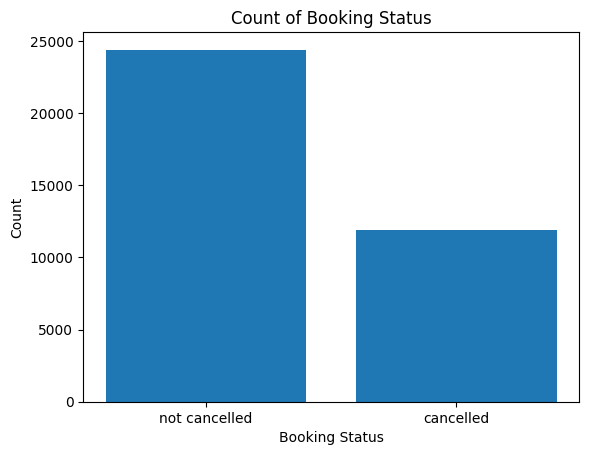

In [13]:
# create a bar plot
plt.bar(['not cancelled', 'cancelled'], hotel_reservation_data['booking_status'].value_counts())

# set the title and labels
plt.title('Count of Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Count')

# display the plot
plt.show()

In [14]:
# One-hot encode the categorical variables and passing the data in a data frame
df = pd.get_dummies(hotel_reservation_data, drop_first=True)

In [15]:
#Validating the encoding was successful
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,...,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_Not_Canceled,quarter_Q2,quarter_Q3,quarter_Q4
0,2,0,1,2,0,224,0,0,0,65.00,...,False,False,False,False,True,False,True,False,False,False
1,2,0,2,3,0,5,0,0,0,106.68,...,False,False,False,False,False,True,True,False,False,False
2,1,0,2,1,0,1,0,0,0,60.00,...,False,False,False,False,False,True,False,True,False,False
3,2,0,0,2,0,211,0,0,0,100.00,...,False,False,False,False,False,True,False,False,True,False
4,2,0,1,1,0,48,0,0,0,94.50,...,False,False,False,False,False,True,False,False,True,False


In [16]:
#Performing the Train Test Split
X = df.drop('booking_status_Not_Canceled', axis=1)
Y = df['booking_status_Not_Canceled']

In [17]:
#Performing chi-square test on the features
chi_scores = chi2(X, Y)
p_values = pd.Series(chi_scores[1], index=X.columns)
p_values_sorted = p_values.sort_values(ascending=True)

<Figure size 1200x800 with 0 Axes>

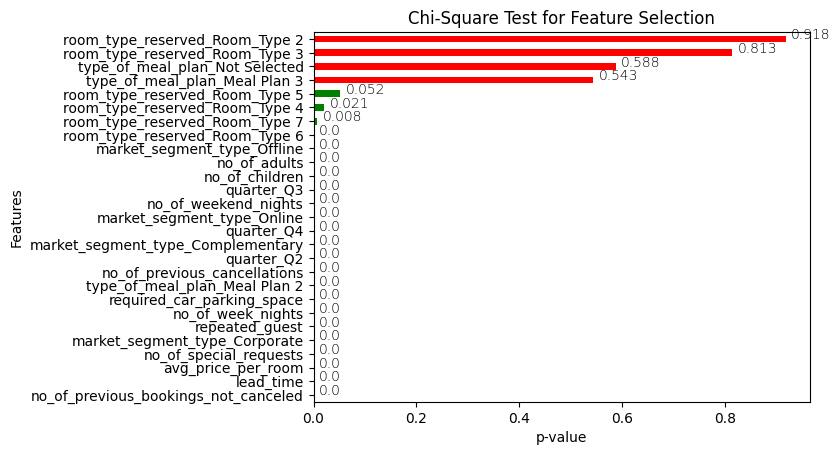

In [18]:
# Plot the p-values and we have color coded the graph based on the p values, we have given the the bar red color where the value is above 0.5 and the rest is colored as green
plt.figure(figsize=(12, 8))
fig, ax = plt.subplots()
colors = np.where(p_values_sorted < 0.5, 'green', 'red')# Adding color based on the p values
p_values_sorted.plot(kind='barh', ax=ax, color=colors)
ax.set_xlabel('p-value')
ax.set_ylabel('Features')
ax.set_title('Chi-Square Test for Feature Selection')

# Add annotations for p-values to improve the readability
for i, v in enumerate(p_values_sorted):
    ax.text(v + 0.01, i, str(round(v, 3)), color='black', fontweight= 8)

plt.show()

In [19]:
#Dropping the features based on the above observations
X = X.drop(["room_type_reserved_Room_Type 2", 'room_type_reserved_Room_Type 3', 'type_of_meal_plan_Not Selected', 'type_of_meal_plan_Meal Plan 3'], axis=1)

In [26]:
print(X.columns)

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2',
       'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5',
       'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online',
       'quarter_Q2', 'quarter_Q3', 'quarter_Q4'],
      dtype='object')


In [27]:
print(X.dtypes)

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
required_car_parking_space                int64
lead_time                                 int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
type_of_meal_plan_Meal Plan 2              bool
room_type_reserved_Room_Type 4             bool
room_type_reserved_Room_Type 5             bool
room_type_reserved_Room_Type 6             bool
room_type_reserved_Room_Type 7             bool
market_segment_type_Complementary          bool
market_segment_type_Corporate              bool
market_segment_type_Offline                bool
market_segment_type_Online                 bool
quarter_Q2                              

In [29]:
# Displaying the range of values in each column of the DataFrame X
range_of_values = X.describe(include='all').loc[['min', 'max']]
print(range_of_values)

     no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
min           0.0             0.0                   0.0                0.0   
max           4.0            10.0                   7.0               17.0   

     required_car_parking_space  lead_time  repeated_guest  \
min                         0.0        0.0             0.0   
max                         1.0      443.0             1.0   

     no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
min                           0.0                                   0.0   
max                          13.0                                  58.0   

     avg_price_per_room  ...  room_type_reserved_Room_Type 5  \
min                 0.0  ...                             NaN   
max               540.0  ...                             NaN   

    room_type_reserved_Room_Type 6 room_type_reserved_Room_Type 7  \
min                            NaN                            NaN   
max                  

In [20]:

#Function for confusion matrix
def print_confusion_matrix(model,Y_actual,labels=[1, 0]):
    Y_predict = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix( Y_actual, Y_predict, labels=[0, 1])
    df_confusion_matrix = pd.DataFrame(confusion_matrix, index = [i for i in ["Actual - No","Actual - Yes"]], columns = [i for i in ['Predicted - No','Predicted - Yes']])
    count = ["{0:0.0f}".format(value) for value in confusion_matrix.flatten()]
    percentage = ["{0:.2%}".format(value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(count,percentage)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_confusion_matrix, annot=labels,fmt='')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

#  Function to calculate model perforance scores
def print_metrics_score(model,flag=True):
    
    scores=[] 
    
    training_prediction = model.predict(X_train)
    testing_prediction = model.predict(X_test)
 
    
    training_accuracy = model.score(X_train,Y_train)
    testing_accuracy = model.score(X_test,Y_test)

    training_recall = metrics.recall_score(Y_train,training_prediction)
    testing_recall = metrics.recall_score(Y_test,testing_prediction)

    training_precision = metrics.precision_score(Y_train,training_prediction)
    testing_precision = metrics.precision_score(Y_test,testing_prediction)

    scores.extend((training_accuracy, testing_accuracy, training_recall, testing_recall, training_precision,testing_precision))
        
    if flag == True: 
        print("Model Accuracy on the Training Set Data : ", model.score(X_train,Y_train))
        print("Model Accuracy on the Testing Set Data : ", model.score(X_test,Y_test))
      
        print("Recall value on the Training Set Data : ", metrics.recall_score(Y_train,training_prediction))
        print("Recall value on the Testing Set Data : ", metrics.recall_score(Y_test,testing_prediction))
        
        print("Precision value on the Training Set Data : : ",metrics.precision_score(Y_train,training_prediction))
        print("Precision on on the Testing Set Data : ", metrics.precision_score(Y_test,testing_prediction))
    
    
    return scores

Model Accuracy on the Training Set Data :  0.9731219848380427
Model Accuracy on the Testing Set Data :  0.9713301171605789
Recall value on the Training Set Data :  0.9791783905458639
Recall value on the Testing Set Data :  0.977493289283502
Precision value on the Training Set Data : :  0.9808845385127863
Precision on on the Testing Set Data :  0.9795158286778398


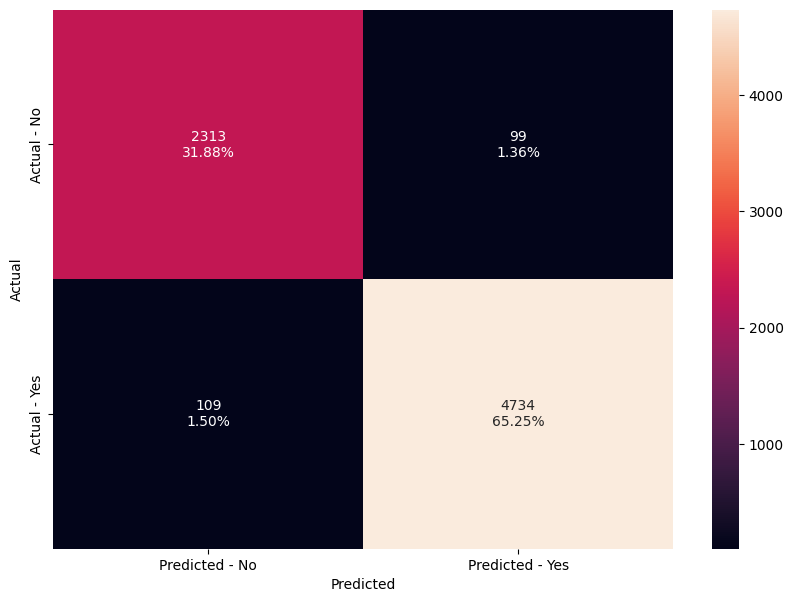

In [21]:
#Model training with 80:20 train test split and the random state is used to replicate the results
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 77)

#Performing oversampling to handle the imbalance in the prediction values
oversampling = SMOTE()
oversampling_X, oversampling_Y = oversampling.fit_resample(X, Y)
oversampling_X_train, oversampling_X_test, oversampling_Y_train, over_Y_test = train_test_split(oversampling_X, oversampling_Y, test_size=0.2, stratify=oversampling_Y, random_state = 77)
SMOTE_RF_Classifier = RandomForestClassifier(n_estimators=150, random_state=77) #Calcuted the optimum value using Grid Search as this process took a lot of time we have removed this code from the notebook
SMOTE_RF_Classifier.fit(oversampling_X_train, oversampling_Y_train)
model_score =SMOTE_RF_Classifier

#Printing the two scores
print_metrics_score(model_score)
print_confusion_matrix(model_score,Y_test)

In [22]:
#Printing the model performance scores
Y_pred = SMOTE_RF_Classifier.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

       False       0.95      0.96      0.96      2412
        True       0.98      0.98      0.98      4843

    accuracy                           0.97      7255
   macro avg       0.97      0.97      0.97      7255
weighted avg       0.97      0.97      0.97      7255



In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc = accuracy_score(Y_test,Y_pred)
f1 = f1_score(Y_test,Y_pred)
prec = precision_score(Y_test,Y_pred)
rec = recall_score(Y_test,Y_pred)
results = pd.DataFrame([['Random Forest Classifier', acc, f1, prec, rec]],
                     columns =  ['Model','Accuracy Score','F1 score','Precision','Recall'])
results

,Model,Accuracy Score,F1 score,Precision,Recall
0,Random Forest Classifier,0.97133,0.978504,0.979516,0.977493


In [25]:
#SMOTE_RF_Classifier
#creating a pickle file for the model
import pickle
pickle_out = open("SMOTE_RF_Classifier.pkl","wb")
pickle.dump(SMOTE_RF_Classifier, pickle_out)
pickle_out.close()

In [34]:
# Define the feature names based on your model's training
feature_names = [
    'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
    'required_car_parking_space', 'lead_time', 'repeated_guest',
    'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
    'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'room_type_reserved_Room_Type 4',
    'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
    'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary',
    'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online',
    'quarter_Q2', 'quarter_Q3', 'quarter_Q4'
]

# Your input data for prediction
X = [2, 2, 3, 4, 1, 200, 1, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

# Create a DataFrame with the feature names and the values to predict
X_df = pd.DataFrame([X], columns=feature_names)

# Make a prediction using the DataFrame
prediction = SMOTE_RF_Classifier.predict(X_df)
print("Prediction:", prediction)

# Predict probabilities
probabilities = SMOTE_RF_Classifier.predict_proba(X_df)

# Print the prediction probabilities
print("Prediction Probabilities:", probabilities)

Prediction: [ True]
Prediction Probabilities: [[0.34488889 0.65511111]]


In [ ]:
#
'''
no_of_adults                              int64   0-4
no_of_children                            int64   0-10
no_of_weekend_nights                      int64   0-7
no_of_week_nights                         int64   0-17
required_car_parking_space                int64   0-1
lead_time                                 int64   0-443
repeated_guest                            int64   0-1
no_of_previous_cancellations              int64   0-13
no_of_previous_bookings_not_canceled      int64   0-58
avg_price_per_room                      float64   0-540   
no_of_special_requests                    int64   
type_of_meal_plan_Meal Plan 2              bool   0-1
room_type_reserved_Room_Type 4             bool   0-1
room_type_reserved_Room_Type 5             bool   0-1
room_type_reserved_Room_Type 6             bool   0-1
room_type_reserved_Room_Type 7             bool   0-1
market_segment_type_Complementary          bool   0-1
market_segment_type_Corporate              bool   0-1
market_segment_type_Offline                bool   0-1
market_segment_type_Online                 bool   0-1
quarter_Q2                                 bool   0-1
quarter_Q3                                 bool   0-1
quarter_Q4                                 bool   0-1
'''